In [ ]:
!pip install pydub==0.25.1
!pip install nnAudio==0.3.1
!pip install yolov5==6.0.6

In [2]:
!git clone https://github.com/RedbirdTaiwan/silic

Cloning into 'silic'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 242 (delta 110), reused 147 (delta 52), pack-reused 18
Receiving objects: 100% (242/242), 206.81 MiB | 30.90 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [3]:
%cd 'silic'
!git pull
import pandas as pd
import silic
from IPython.display import Image

/content/silic
Already up to date.


In [4]:
model = silic.Silic()
model.audio('sample/49593.mp3')

STFT kernels created, time used = 0.2230 seconds
STFT kernels created, time used = 0.1033 seconds
STFT filter created, time used = 0.0068 seconds
Mel filter created, time used = 0.0069 seconds
Origional audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s
Standarized audio: channel = 1, sample_rate = 32000 Hz, sample_size = 192000, duration = 6.0 s


Spectrogram was saved to sample/linear/49593.jpg.


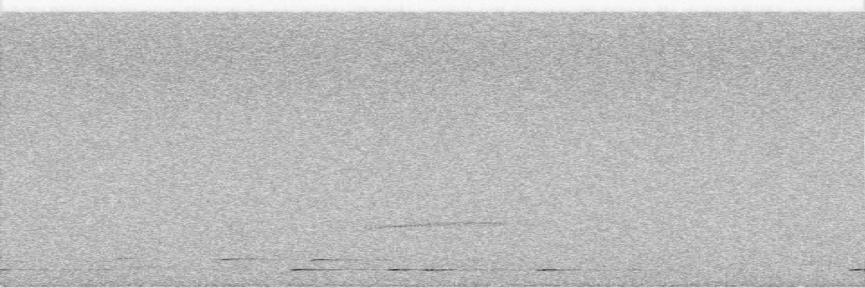

In [5]:
spect_linear = model.tfr()
Image(spect_linear)

Spectrogram was saved to sample/mel/49593.jpg.


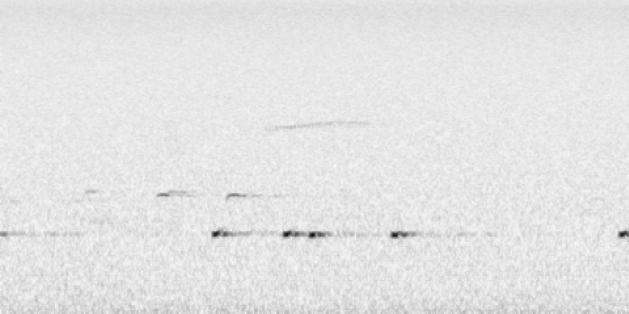

In [6]:
spect_mel = model.tfr(spect_type='mel')
Image(spect_mel)

Spectrogram was saved to sample/rainbow/49593.jpg.


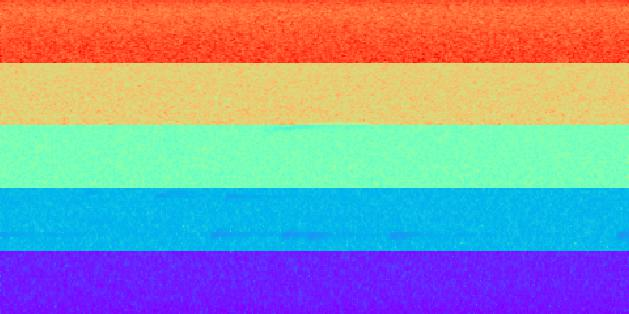

In [7]:
spect_rainbow = model.tfr(spect_type='rainbow')
Image(spect_rainbow)

In [8]:
labels = model.detect(weights='model/exp20/best.pt', step=1000, soundclasses=[66,101], conf_thres=0.1)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Spectrogram was saved to sample/rainbow/49593.jpg.


In [9]:
df = pd.DataFrame(labels[1:],columns=labels[0])
df = df.sort_values('time_begin')
print(df)

               file  classid  time_begin  time_end  freq_low  freq_high  score
2  sample/49593.mp3      101           0       984      1364       1703  0.281
1  sample/49593.mp3      101         774      2083      1384       1772  0.146
4  sample/49593.mp3      101        1430      2796      1364       1749  0.144
0  sample/49593.mp3      101        1500      2866      1326       1772  0.107
5  sample/49593.mp3       66        1994      3083       824       1178  0.473
3  sample/49593.mp3       66        1997      2990       810       1196  0.685
7  sample/49593.mp3       66        2010      3089       824       1196  0.656
6  sample/49593.mp3      101        2048      2793      1326       1772  0.165
9  sample/49593.mp3       66        3000      3946       796       1196  0.697
8  sample/49593.mp3       66        5876      6000       740       1196  0.254


In [10]:
newlabels = silic.clean_multi_boxes(labels)
print(newlabels)

               file  classid  time_begin  time_end  freq_low  freq_high  score
0  sample/49593.mp3      101           0       984      1364       1703  0.281
1  sample/49593.mp3      101         774      2866      1326       1772  0.165
2  sample/49593.mp3       66        1994      3089       810       1196  0.685
3  sample/49593.mp3       66        3000      3946       796       1196  0.697
4  sample/49593.mp3       66        5876      6000       740       1196  0.254


In [11]:
label_img = silic.draw_labels(model, newlabels)

Spectrogram was saved to sample/linear/49593.jpg.
sample/labels/49593.jpg saved


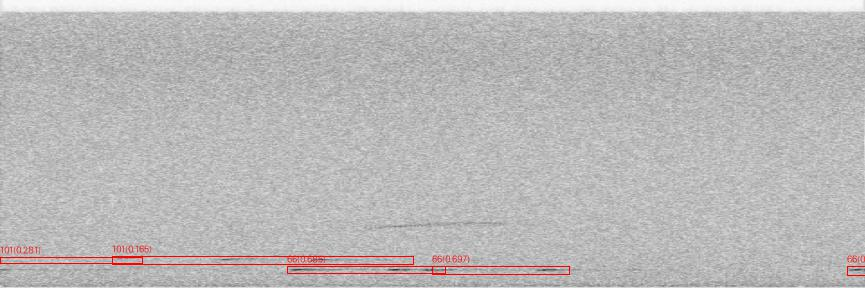

In [12]:
Image(label_img)